In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline

## Data Cleanup

### Cleaning Data for Sentiment Analysis

In [6]:
# Reading in the CSV lookup table file
twitter_ticker_accounts = pd.read_csv('data/twitter_accounts_with_ticker_data.csv')
twitter_ticker_accounts.head()

,Accounts,Count of Tweets,Ticker Symbol
0,AmazonHelp,169840,AMZN
1,AppleSupport,106860,AAPL
2,Delta,42253,DAL
3,AmericanAir,36764,AAL
4,SouthwestAir,28977,LUV


In [7]:
# Reading in the tweet data
tweets = pd.read_csv('data/twcs.csv')

In [8]:
# Getting only the tweet data that we have stock data for
twitter_accounts = twitter_ticker_accounts['Accounts']
tweets_v2 = tweets.author_id.isin(twitter_accounts)
tweets['Match?'] = tweets_v2
tweets = tweets[tweets['Match?'] == True]
tweets.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,Match?
15,21,Ask_Spectrum,False,Tue Oct 31 22:14:37 +0000 2017,@115716 What information is incorrect? ^JK,"22,23",24.0,True
17,25,Ask_Spectrum,False,Tue Oct 31 22:18:28 +0000 2017,@115716 Our department is part of the corporat...,26,22.0,True
19,27,Ask_Spectrum,False,Tue Oct 31 22:21:26 +0000 2017,@115716 No thank you. ^JK,NaN,26.0,True
22,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,@115716 The information pertaining to the acco...,24,29.0,True
24,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"@115717 Hello, My apologies for any frustratio...",NaN,31.0,True


In [ ]:
# Creating the final tweet CSV file
# Move to your data folder
tweets.to_csv('final_tweet_file.csv')

### Cleaning the Data for KMeans Modeling

In [11]:
df_twitter = pd.read_csv('data/final_tweet_file.csv')

In [ ]:
# Making all tweets lowercase
df_twitter['text'] = df_twitter["text"].str.lower()

# initializing stop words
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
nltk.download('punkt')

# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~‘'''


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Creating function to create dataframe for each tweet, eliminating stop words and punctuation
# Please note the column name is the tweet_id name

df_tweets = pd.DataFrame()

def twitter_tweets(number_of_rows):
    for x in range(number_of_rows):
        tweet_filtered = []
        words_in_tweet = word_tokenize(df_twitter['text'][x])
        for w in words_in_tweet:
            if w not in stop_words:
                if w not in punc:
                    tweet_filtered.append(w)
        df_tweets[df_twitter['tweet_id'][x]] = pd.Series(tweet_filtered)

twitter_tweets(20000)


C:\Users\carol\AppData\Local\Temp/ipykernel_6836/380441510.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tweets[df_twitter['tweet_id'][x]] = pd.Series(tweet_filtered)


In [ ]:
# CSV file for tweets from function
print(df_tweets.shape)
df_tweets.to_csv('data/tweets.csv')

(12, 20000)


In [ ]:
# Transpose the Twitter Dataframe for analysis
df_tweets_transpose = df_tweets.T
first_column = df_twitter['tweet_id'][:20000]
# insert column using insert(position,column_name,first_column) function
df_tweets_transpose.insert(0, 'Tweet_ID', first_column)
df_tweets_transpose.head(n=30)
df_tweets_transpose.to_csv('tweets_transpose.csv')

In [ ]:
df_tweets = pd.read_csv('tweets.csv', usecols=range(2,2000))
print(df_tweets)
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(df_tweets)
print(X)
X.dtype

             2           3        4           5        6           8  \
0   sprintcare  sprintcare   115712  sprintcare   115712  sprintcare   
1      propose        sent   please         NaN   please       worst   
2          NaN     several     send         NaN     send    customer   
3          NaN     private       us         NaN       us     service   
4          NaN    messages  private         NaN  private         NaN   
5          NaN         one  message         NaN  message         NaN   
6          NaN  responding   assist         NaN     gain         NaN   
7          NaN       usual    click         NaN  details         NaN   
8          NaN         NaN  message         NaN  account         NaN   
9          NaN         NaN        ’         NaN      NaN         NaN   
10         NaN         NaN      top         NaN      NaN         NaN   
11         NaN         NaN  profile         NaN      NaN         NaN   

           11            12          15          16  ...      2

dtype('float64')

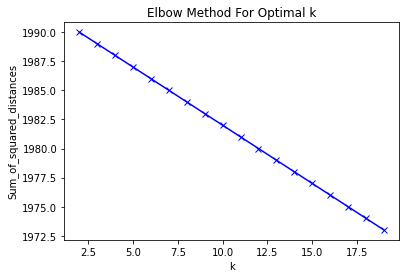

In [ ]:
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()